In [1]:
import shutil
import os

ROOT_DIR = '/content/Blood_cell'

if os.path.exists(ROOT_DIR):
    shutil.rmtree(ROOT_DIR)
    print(ROOT_DIR, 'is removed !')

In [2]:
import zipfile
import os

DATA_ROOT_PATH = '/content/drive/MyDrive/Git/ICT_Visual/Data'

with zipfile.ZipFile(os.path.join(DATA_ROOT_PATH,'Blood_cell.zip')) as target_file:

    target_file.extractall('Blood_cell')

In [3]:
TRAIN_DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'TRAIN')
TEST_DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'TEST')
TEST_SIMPLE_DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'TEST_SIMPLE')

# 전체 데이터 개수 확인

In [4]:
# TRAIN 
train_label_list = os.listdir(TRAIN_DATA_ROOT_DIR)
for label_name in train_label_list:

    print(f'train {label_name} => {len(os.listdir(os.path.join(TRAIN_DATA_ROOT_DIR, label_name)))}')
print('=============================================')

# TEST
test_label_list = os.listdir(TEST_DATA_ROOT_DIR)
for label_name in test_label_list:

    print(f'test {label_name} => {len(os.listdir(os.path.join(TEST_DATA_ROOT_DIR, label_name)))}')
print('=============================================')

# TEST SIMPLE
test_simple_label_list = os.listdir(TEST_SIMPLE_DATA_ROOT_DIR)
for label_name in test_simple_label_list:

    print(f'test simple {label_name} => {len(os.listdir(os.path.join(TEST_SIMPLE_DATA_ROOT_DIR, label_name)))}')

print('=============================================')

train EOSINOPHIL => 2497
train LYMPHOCYTE => 2483
train MONOCYTE => 2478
train NEUTROPHIL => 2499
test EOSINOPHIL => 623
test LYMPHOCYTE => 620
test MONOCYTE => 620
test NEUTROPHIL => 624
test simple EOSINOPHIL => 13
test simple LYMPHOCYTE => 6
test simple MONOCYTE => 4
test simple NEUTROPHIL => 48


# 이미지 사이즈 통계


In [5]:
import numpy as np
import glob
import cv2

# TRAIN 
train_label_list = os.listdir(TRAIN_DATA_ROOT_DIR)
for label_name in train_label_list:

    label_path = os.path.join(TRAIN_DATA_ROOT_DIR, label_name)
    
    img_file_list = glob.glob(label_path + '/*.jpeg')
    width_list = []
    height_list = []

    for file_name in img_file_list:
        try:

            src_img = cv2.imread(file_name, cv2.IMREAD_COLOR)
            width_list.append(src_img.shape[0])
            height_list.append(src_img.shape[1])
        except Exception as err:
            print(str(err), file_name)
    width_np = np.array(width_list)
    height_np = np.array(width_list)
    print('==========================================================================================')
    print(label_name, 'avg width :', np.average(width_np), 'average height :', np.average(height_np)) 
    print(label_name, 'std width :', np.std(width_np), 'average height :', np.std(height_np)) 
    print(label_name, 'max width :', np.max(width_np), 'average height :', np.max(height_np)) 
    print(label_name, 'min width :', np.min(width_np), 'average height :', np.min(height_np)) 
    print('==========================================================================================')

EOSINOPHIL avg width : 240.0 average height : 240.0
EOSINOPHIL std width : 0.0 average height : 0.0
EOSINOPHIL max width : 240 average height : 240
EOSINOPHIL min width : 240 average height : 240
LYMPHOCYTE avg width : 240.0 average height : 240.0
LYMPHOCYTE std width : 0.0 average height : 0.0
LYMPHOCYTE max width : 240 average height : 240
LYMPHOCYTE min width : 240 average height : 240
MONOCYTE avg width : 240.0 average height : 240.0
MONOCYTE std width : 0.0 average height : 0.0
MONOCYTE max width : 240 average height : 240
MONOCYTE min width : 240 average height : 240
NEUTROPHIL avg width : 240.0 average height : 240.0
NEUTROPHIL std width : 0.0 average height : 0.0
NEUTROPHIL max width : 240 average height : 240
NEUTROPHIL min width : 240 average height : 240


# 이미지 사이즈 정의

In [6]:
IMG_WIDTH = 240
IMG_HEIGHT = 240

# ImageDataGenerator 정의

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)
test_simple_gen = ImageDataGenerator(rescale=1./255)


In [15]:
train_data = train_gen.flow_from_directory(directory=TRAIN_DATA_ROOT_DIR,
                                           batch_size=16, color_mode='rgb',
                                           class_mode='sparse',
                                           target_size=(IMG_WIDTH, IMG_HEIGHT))
test_data = train_gen.flow_from_directory(directory=TEST_DATA_ROOT_DIR,
                                          batch_size=16, color_mode='rgb',
                                          class_mode='sparse',
                                          target_size=(IMG_WIDTH, IMG_HEIGHT))                                                                                      
test_simple_data = train_gen.flow_from_directory(directory=TEST_SIMPLE_DATA_ROOT_DIR,
                                                 batch_size=16, color_mode='rgb',
                                                 class_mode='sparse',
                                                 target_size=(IMG_WIDTH, IMG_HEIGHT))

Found 9957 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.
Found 71 images belonging to 4 classes.


In [16]:
print(train_data.class_indices)
print(train_data.num_classes)

{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3}
4


# 모델링

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNet

In [35]:
pre_trained_model = MobileNet(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH,IMG_HEIGHT,3))


17235968/17225924 [==============================] - 0s 0us/step


In [39]:
class_nums = train_data.num_classes
model = Sequential()

model.add(pre_trained_model)

model.add(GlobalAveragePooling2D())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(class_nums,activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d_5   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_15 (Dense)            (None, 128)               131200    
                                                                 
 dropout_22 (Dropout)        (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dropout_23 (Dropout)        (None, 64)               

In [40]:
model.compile(optimizer=Adam(2e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [41]:
from datetime import datetime
from tensorflow.keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor='val_acc',
                          patience=5,
                          verbose=1)

start_time = datetime.now()

hist = model.fit(train_data,
                 epochs=30,
                 validation_data=test_data,
                 callbacks=[earlystop])

end_time = datetime.now()

print('\n\nElapsed time => ', end_time - start_time)


Epoch 1/30
623/623 [==============================] - 131s 203ms/step - loss: 1.3914 - acc: 0.2861 - val_loss: 1.2595 - val_acc: 0.3888
Epoch 2/30
623/623 [==============================] - 125s 200ms/step - loss: 1.2338 - acc: 0.4212 - val_loss: 1.1269 - val_acc: 0.4668
Epoch 3/30
623/623 [==============================] - 125s 200ms/step - loss: 1.0480 - acc: 0.5466 - val_loss: 0.9150 - val_acc: 0.6180
Epoch 4/30
623/623 [==============================] - 125s 201ms/step - loss: 0.7930 - acc: 0.6541 - val_loss: 0.6633 - val_acc: 0.7021
Epoch 5/30
623/623 [==============================] - 125s 201ms/step - loss: 0.6468 - acc: 0.6981 - val_loss: 0.6324 - val_acc: 0.7278
Epoch 6/30
623/623 [==============================] - 125s 201ms/step - loss: 0.5619 - acc: 0.7398 - val_loss: 0.6192 - val_acc: 0.7254
Epoch 7/30
623/623 [==============================] - 125s 201ms/step - loss: 0.5236 - acc: 0.7617 - val_loss: 0.5760 - val_acc: 0.7427
Epoch 8/30
623/623 [============================

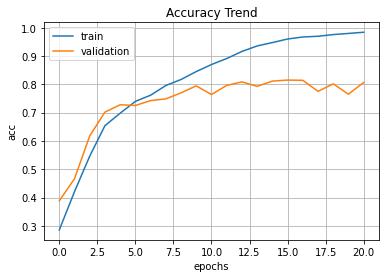

In [42]:
import matplotlib.pyplot as plt
plt.plot(hist.history['acc'],label='train')
plt.plot(hist.history['val_acc'],label='validation')
plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.grid()
plt.legend()
plt.show()


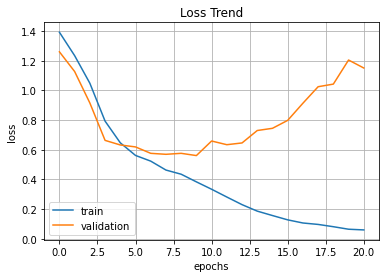

In [43]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],label='validation')
plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.legend()
plt.show()


In [44]:
model.evaluate(test_data)

156/156 [==============================] - 8s 50ms/step - loss: 1.1506 - acc: 0.8066


[1.1505683660507202, 0.8065943121910095]

In [45]:
model.evaluate(test_simple_data)

5/5 [==============================] - 0s 47ms/step - loss: 1.0828 - acc: 0.7887


[1.0827937126159668, 0.7887324094772339]